# Proyecto CC5206

Mineria de datos sobre datasets del banco mundial. Eliminar ultimas filas del excel

# Importar librerias y dataset

In [343]:
import numpy as np
import pandas as pd
import pdb

yr = 2015 #IR CAMBIANDO EL AÑO
fname = 'dev_'+str(yr)+'_proc.xlsx'

d_2016 = pd.read_excel(fname, keep_default_na=False, na_values='')

d_2016.head()

,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),Adjusted savings: mineral depletion (% of GNI),...,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),Urban population growth (annual %),"Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,17.305714,89.500000,87.800000,98.700000,4.097370,11.783514,1.600000,0.005480,...,12.092,7.681000,8.449,23.087000,16.910999,18.110001,8609463,26.282,4.759368,0.985716
1,Albania,ALB,67.078662,100.000000,100.000000,100.000000,1.074093,10.433900,3.227126,0.214263,...,15.164,19.089001,17.490,30.841999,40.317001,36.895000,1629715,56.409,1.628564,9.739305
2,Algeria,DZA,99.990000,100.000000,99.625305,100.000000,1.958417,7.550825,4.467196,0.008514,...,17.171,9.046000,10.600,41.673000,22.193001,25.688000,27429775,70.129,2.887245,21.707935
5,Angola,AGO,47.648150,32.000000,3.000000,51.000000,0.844656,32.645405,3.570000,0.000000,...,7.313,6.395000,6.804,12.295000,10.868000,11.524000,11649562,43.274,5.313729,142.938916
6,Antigua and Barbuda,ATG,99.990000,96.442986,100.000000,85.295711,1.396521,11.307852,2.250000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,23918,24.190,-0.787094,106.297633


# Eliminar Outliers

In [344]:
#'''
outliers1 = [u'High income', u'High income: OECD', u'OECD members', u'World']
outliers2 = [u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Euro area',u'Europe & Central Asia',u'European Union',u'Low & middle income',
             u'Middle income',u'North America',u'Upper middle income']

outliers3 = [u'Arab World', u'Sub-Saharan Africa',
             u'Sub-Saharan Africa (excluding high income)', u'Middle East & North Africa',
             u'Middle East & North Africa (excluding high income)', 
             u'Latin America & Caribbean',u'Latin America & Caribbean (excluding high income)',
             u'Least developed countries: UN classification', 
             u'Heavily indebted poor countries (HIPC)',u'High income',u'High income: nonOECD',
             u'High income: OECD', u'Euro area',u'Europe & Central Asia',
             u'Europe & Central Asia (excluding high income)',u'European Union',
             u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Lower middle income',u'South Asia']

outliers4 = [u'IDA & IBRD total', u'IDA blend', u'IDA only', u'IDA total',
            u'East Asia & Pacific (IDA & IBRD countries)',u'Europe & Central Asia (IDA & IBRD countries)',
            u'Fragile and conflict affected situations',u'IBRD only',u'Late-demographic dividend',
            u'Latin America & the Caribbean (IDA & IBRD countries)',
            u'Middle East & North Africa (IDA & IBRD countries)',u'Not classified',
            u'Other small states',u'Post-demographic dividend',u'Pre-demographic dividend']


outliers5 = [u'Early-demographic dividend',u'Early-demographic dividend',u'Central Europe and the Baltics',
            u'South Asia (IDA & IBRD)',u'Sub-Saharan Africa (IDA & IBRD countries)',
            u'Sub-Saharan Africa (IDA & IBRD countries)', u'South Asia (IDA & IBRD)',u'Low income']

for out in outliers1:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers2:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers3:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers4:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers5:
    d_2016 = d_2016[d_2016['Country Name'] != out]
#paises = xdata['Country Name'].values.tolist()
paises = d_2016['Country Name'].values.tolist()
#xdata.head()

# Normalización

In [345]:
d_2016_n = d_2016
for k in range(2,len(d_2016.keys())):
    
    llave = d_2016.keys()[k]
    valores = d_2016[llave] 
    xvals = valores.tolist()
    #Normalización
    xmax = np.nanmax(valores)#[0]
    xmin = np.nanmin(valores)#[0]
    norm = xmax - xmin
    #pdb.set_trace()
    if (not np.isnan(xmax)) and norm!=0:
            d_2016_n[llave] = (d_2016[llave]-xmin)/norm
    

d_2016_n.head()

,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),Adjusted savings: mineral depletion (% of GNI),...,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),Urban population growth (annual %),"Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,0.156181,0.887097,0.877510,0.984379,0.308470,0.231358,0.060729,0.000342,...,0.313313,0.252666,0.267305,0.315094,0.266679,0.279478,0.011567,0.193898,0.709483,0.000269
1,Albania,ALB,0.664068,1.000000,1.000000,1.000000,0.072657,0.199308,0.170521,0.013355,...,0.393428,0.631581,0.556765,0.421470,0.640356,0.572038,0.002163,0.523335,0.325360,0.006134
2,Algeria,DZA,0.999898,1.000000,0.996238,1.000000,0.141634,0.130844,0.254197,0.000531,...,0.445769,0.298004,0.336172,0.570039,0.351007,0.397499,0.036921,0.673362,0.479789,0.014153
5,Angola,AGO,0.465797,0.268817,0.026104,0.411197,0.054762,0.726768,0.193657,0.000000,...,0.188682,0.209951,0.214638,0.167060,0.170203,0.176907,0.015662,0.379705,0.777498,0.095378
6,Antigua and Barbuda,ATG,0.999898,0.961753,1.000000,0.823308,0.097806,0.220062,0.104588,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.171022,0.028979,0.070828


# Analisis Estadistico

In [346]:
varianzas = []
promedios = []
maximos = []
minimos = []
desv = []
for k in range(2,len(d_2016_n.keys())):
    
    llave = d_2016_n.keys()[k]
    valores = d_2016_n[llave] 
    count = 0
    
    #Normalización
    xmax = np.nanmax(valores)
    xmean = np.nanmean(valores)
    xmin = np.nanmin(valores)
    xstd = np.nanstd(valores)
    xvar = np.nanvar(valores)
    if np.isnan(xvar):
        print llave
    
    promedios.append(xmean)
    minimos.append(xmin)
    maximos.append(xmax)
    desv.append(xstd)
    varianzas.append(xvar)
    
sort = np.sort(varianzas)

most = -1   

print "Estadisticas con mayor varianza:"
#pdb.set_trace()
for i in range(10):
    value = sort[most]
    j = np.argwhere(varianzas == sort[most])+2
    features = d_2016_n.keys()
    print str(i+1)+' '+str(features[j])+' ('+str(sort[most]) +')'
    most-=1


Estadisticas con mayor varianza:
1 Index([[u'Depth of credit information index (0=low to 8=high)']], dtype='object') (0.153440335373)
2 Index([[u'Access to clean fuels and technologies for cooking  (% of population)']], dtype='object') (0.150517098571)
3 Index([[u'Private credit bureau coverage (% of adults)']], dtype='object') (0.134508824637)
4 Index([[u'Access to electricity, rural (% of rural population)']], dtype='object') (0.132454731998)
5 Index([[u'People using basic sanitation services, rural (% of rural population)']], dtype='object') (0.116091129559)
6 Index([[u'Improved sanitation facilities, rural (% of rural population with access)']], dtype='object') (0.113724549675)
7 Index([[u'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)']], dtype='object') (0.10858726944)
8 Index([[u'Improved sanitation facilities (% of population with access)']], dtype='object') (0.105380827559)
9 Index([[u'Renewable electricity output (% of total electricity output)'

# Graficos

## Histogramas

In [347]:
'''
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x = []
for nonan in xdata['Population ages 0-14, total']:
#for nonan in xdata['Self-employed, male (% of males employed)']:
    if not np.isnan(nonan):
        x.append(nonan)

ax1.hist(x, 5, facecolor='green', alpha=0.75)

ax1.set_xlabel('Population ages 0-14')
ax1.set_ylabel('Total')
#ax1.title('Histograma')

#plt.add_subplot(212, facecolor='r')
x =[]
for nonan in xdata['Self-employed, male (% of males employed)']:
    if not np.isnan(nonan):
        x.append(nonan)

ax2.hist(x, 5, facecolor='blue', alpha=0.75)

ax2.set_xlabel('Self-employed, male')
ax2.set_ylabel('% of males employed')

plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\nfig = plt.figure(figsize=(10,4))\nax1 = fig.add_subplot(1, 2, 1)\nax2 = fig.add_subplot(1, 2, 2)\n\nx = []\nfor nonan in xdata['Population ages 0-14, total']:\n#for nonan in xdata['Self-employed, male (% of males employed)']:\n    if not np.isnan(nonan):\n        x.append(nonan)\n\nax1.hist(x, 5, facecolor='green', alpha=0.75)\n\nax1.set_xlabel('Population ages 0-14')\nax1.set_ylabel('Total')\n#ax1.title('Histograma')\n\n#plt.add_subplot(212, facecolor='r')\nx =[]\nfor nonan in xdata['Self-employed, male (% of males employed)']:\n    if not np.isnan(nonan):\n        x.append(nonan)\n\nax2.hist(x, 5, facecolor='blue', alpha=0.75)\n\nax2.set_xlabel('Self-employed, male')\nax2.set_ylabel('% of males employed')\n\nplt.show()\n"

## Codo

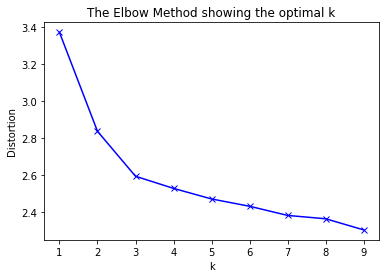

In [348]:
np_df = d_2016_n.as_matrix()
test = np_df[:,2:]
for row in range(test.shape[0]):
    for column in range(test.shape[1]):
        val = test[row][column]
        #print val
        if np.isnan(val):
            test[row][column]= promedios[column] 
        else:
            #test[row][column]= val/maximos[column] 
            pass

xdf = pd.DataFrame(test)

vectors = []
tot = test#.T
for i in range(len(tot[:,0])):
    vectors.append(tot[i])
    

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from scipy.spatial.distance import cdist

X = tot

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# TSNE

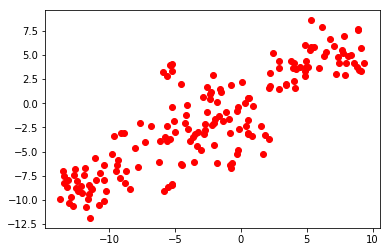

In [349]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = vectors
X_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
X_embedded.shape
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c="r", cmap=plt.cm.Spectral)
plt.show()

# PCA

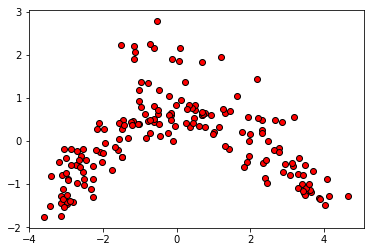

In [350]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[:, 0], X[:, 1], c="r", cmap=plt.cm.spectral,
           edgecolor='k')


plt.show()

# clustering

In [351]:
from sklearn.cluster import KMeans
from sklearn import datasets

X = tot

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_



# tSNE

In [352]:
%matplotlib inline

r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c=[]
c_l=[]
m=[]
m_l=[]

plt.gcf().clear()
r_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
r_embedded.shape
for k in range(len(labels)):
    if labels[k]==0:
        r.append(X_embedded[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X_embedded[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X_embedded[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X_embedded[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X_embedded[k])
        c_l.append(paises[k])
    elif labels[k]==5:
        m.append(X_embedded[k])
        m_l.append(paises[k])
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in m], [item[1] for item in m], c="m", cmap=plt.cm.Spectral)
#plt.show()
tsnename='k3_dev_'+str(yr)+'_tsne'
plt.savefig(tsnename)
plt.gcf().clear()

# PCA 

In [353]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c = []
c_l = []

for k in range(len(labels)):
    if labels[k]==0:
        r.append(X[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X[k])
        c_l.append(paises[k])
        
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
#plt.show()
pcaname='k3_dev_'+str(yr)+'_pca'
plt.savefig(pcaname)
plt.gcf().clear()

In [354]:
r_l

[u'Algeria',
 u'Antigua and Barbuda',
 u'Argentina',
 u'Armenia',
 u'Azerbaijan',
 u'Bahamas, The',
 u'Bahrain',
 u'Bangladesh',
 u'Belize',
 u'Bhutan',
 u'Bolivia',
 u'Botswana',
 u'Brazil',
 u'Brunei Darussalam',
 u'Cabo Verde',
 u'Caribbean small states',
 u'Chile',
 u'Colombia',
 u'Costa Rica',
 u'Dominican Republic',
 u'Ecuador',
 u'Egypt, Arab Rep.',
 u'El Salvador',
 u'Fiji',
 u'Grenada',
 u'Guatemala',
 u'Guyana',
 u'Honduras',
 u'India',
 u'Indonesia',
 u'Iran, Islamic Rep.',
 u'Iraq',
 u'Jamaica',
 u'Jordan',
 u'Kazakhstan',
 u'Kuwait',
 u'Kyrgyz Republic',
 u'Lebanon',
 u'Malaysia',
 u'Maldives',
 u'Mauritius',
 u'Mexico',
 u'Mongolia',
 u'Morocco',
 u'Nicaragua',
 u'Oman',
 u'Pacific island small states',
 u'Pakistan',
 u'Panama',
 u'Paraguay',
 u'Peru',
 u'Philippines',
 u'Qatar',
 u'Samoa',
 u'Saudi Arabia',
 u'Seychelles',
 u'Small states',
 u'South Africa',
 u'Sri Lanka',
 u'St. Lucia',
 u'St. Vincent and the Grenadines',
 u'Suriname',
 u'Tajikistan',
 u'Tonga',
 u'Trin

In [355]:
g_l

[u'Afghanistan',
 u'Angola',
 u'Benin',
 u'Burkina Faso',
 u'Burundi',
 u'Cambodia',
 u'Cameroon',
 u'Central African Republic',
 u'Chad',
 u'Comoros',
 u'Congo, Dem. Rep.',
 u'Congo, Rep.',
 u"Cote d'Ivoire",
 u'Djibouti',
 u'Equatorial Guinea',
 u'Ethiopia',
 u'Gabon',
 u'Gambia, The',
 u'Ghana',
 u'Guinea',
 u'Guinea-Bissau',
 u'Haiti',
 u'Kenya',
 u'Lao PDR',
 u'Lesotho',
 u'Liberia',
 u'Madagascar',
 u'Malawi',
 u'Mali',
 u'Mauritania',
 u'Mozambique',
 u'Myanmar',
 u'Namibia',
 u'Nepal',
 u'Niger',
 u'Nigeria',
 u'Papua New Guinea',
 u'Rwanda',
 u'Sao Tome and Principe',
 u'Senegal',
 u'Sierra Leone',
 u'Solomon Islands',
 u'Sudan',
 u'Swaziland',
 u'Tanzania',
 u'Timor-Leste',
 u'Togo',
 u'Uganda',
 u'Yemen, Rep.',
 u'Zambia',
 u'Zimbabwe']

In [356]:
b_l

[u'Albania',
 u'Australia',
 u'Austria',
 u'Barbados',
 u'Belarus',
 u'Belgium',
 u'Bosnia and Herzegovina',
 u'Bulgaria',
 u'Canada',
 u'China',
 u'Croatia',
 u'Cyprus',
 u'Czech Republic',
 u'Denmark',
 u'Estonia',
 u'Finland',
 u'France',
 u'Georgia',
 u'Germany',
 u'Greece',
 u'Hong Kong SAR, China',
 u'Hungary',
 u'Iceland',
 u'Ireland',
 u'Israel',
 u'Italy',
 u'Japan',
 u'Korea, Rep.',
 u'Latvia',
 u'Lithuania',
 u'Luxembourg',
 u'Macedonia, FYR',
 u'Malta',
 u'Moldova',
 u'Montenegro',
 u'Netherlands',
 u'New Zealand',
 u'Norway',
 u'Poland',
 u'Portugal',
 u'Romania',
 u'Russian Federation',
 u'Serbia',
 u'Singapore',
 u'Slovak Republic',
 u'Slovenia',
 u'Spain',
 u'Sweden',
 u'Switzerland',
 u'Thailand',
 u'Ukraine',
 u'United Kingdom',
 u'United States',
 u'Uruguay']

In [357]:
y_l

[]

In [358]:
c_l

[]

In [359]:
m_l

[]

## Exportar Etiquetas

In [360]:
clusters = [r,g,b,y,c,m]
clusters_l = [r_l,g_l,b_l,y_l,c_l,m_l]
ncluster = 1
pre_out = []#('Country','Label')]
for cluster_l in clusters_l:
    for country in cluster_l:
        pre_out.append((country,ncluster))
    ncluster +=1

out = pd.DataFrame(pre_out,columns=['Country', 'Label'])
out.head()
labelname='Labels'+str(yr)+'.xlsx'
writer = pd.ExcelWriter(labelname)
out.to_excel(writer,'Data')
writer.save()